In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('../Artifacts/reddit comments.csv')

In [8]:
data.head()

,comment_id,self_text,label
0,k70vrzb,Lol what kind of busted translator device you ...,0.0
1,k70vk4r,Translation:\n\nAmen. Kill jews and continue g...,0.0
2,k70vhew,Friendly fact reminder: Israel has been steali...,0.0
3,k70ve4h,"Well, i would never support Hamas, but there a...",0.0
4,k70vaxh,There is absolutely evidence of Hamas taking C...,1.0


## Data Preproccesing

In [9]:
data.shape

(10001, 3)

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.isnull().sum()

comment_id    0
self_text     0
label         2
dtype: int64

### Text preprocess

In [12]:
import re
import string

Convert uppercase to lowercase

In [13]:
data["self_text"] = data["self_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [14]:
data["self_text"].head(5)

0    lol what kind of busted translator device you ...
1    translation: amen. kill jews and continue gaza...
2    friendly fact reminder: israel has been steali...
3    well, i would never support hamas, but there a...
4    there is absolutely evidence of hamas taking c...
Name: self_text, dtype: object

Remove links

In [15]:
data["self_text"] = data['self_text'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [16]:
data["self_text"].head(10)

0    lol what kind of busted translator device you ...
1    translation: amen. kill jews and continue gaza...
2    friendly fact reminder: israel has been steali...
3    well, i would never support hamas, but there a...
4    there is absolutely evidence of hamas taking c...
5    do you have the avtual link to the new york ti...
6    i didn't deny anything you said. i said israel...
7    &gt;yes, exactly, hamas attacked, not the 1 mi...
8    firstly, even in the best scenario you are con...
9    oh. i guess since hamas is putting the childre...
Name: self_text, dtype: object

Remove punctuation

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["self_text"] = data["self_text"].apply(remove_punctuations)

In [19]:
data["self_text"].head(10)

0    lol what kind of busted translator device you ...
1    translation amen kill jews and continue gazan ...
2    friendly fact reminder israel has been stealin...
3    well i would never support hamas but there act...
4    there is absolutely evidence of hamas taking c...
5    do you have the avtual link to the new york ti...
6    i didnt deny anything you said i said israel d...
7    gtyes exactly hamas attacked not the 1 million...
8    firstly even in the best scenario you are conf...
9    oh i guess since hamas is putting the children...
Name: self_text, dtype: object

Remove numbers

In [20]:
data["self_text"] = data['self_text'].str.replace('\d+', '', regex=True)

In [21]:
data["self_text"].tail(10)

9991                               won you say fascinating
9992     gt has to be more important that is only true ...
9993     there’s no way this person was a staff member ...
9994     yeah super peaceful protests with all those ak...
9995               shes too old to be acting this childish
9996     gtthe same people ive been fighting equal righ...
9997     do you think someone has the right to kick you...
9998        but nobody think it was egypt and syria either
9999     we should build arenas for the sole purpose of...
10000    cnn said that hamas bases under the same hospi...
Name: self_text, dtype: object

Remove stopwords

In [22]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import nltk

In [24]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [26]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
data["self_text"] = data["self_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [28]:
data["self_text"].head()

0    lol kind busted translator device got speak ha...
1    translation amen kill jews continue gazan oppr...
2    friendly fact reminder israel stealing palesti...
3    well would never support hamas actions israel ...
4    absolutely evidence hamas taking captagon drug...
Name: self_text, dtype: object

Stemming

In [29]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [30]:
data["self_text"] = data["self_text"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [31]:
data["self_text"].head()


0       lol kind bust translat devic got speak hasbara
1         translat amen kill jew continu gazan oppress
2    friendli fact remind israel steal palestin lan...
3    well would never support hama action israel co...
4    absolut evid hama take captagon drug similar p...
Name: self_text, dtype: object

## Building vocabulary 

In [32]:
from collections import Counter
vocab = Counter()

In [33]:
vocab

Counter()

In [34]:
for sentence in data['self_text']:
    vocab.update(sentence.split())

In [35]:
len(vocab)

13638

In [36]:
data.shape

(10001, 3)

In [37]:
vocab

Counter({'israel': 3947,
         'hama': 2877,
         'peopl': 2519,
         'palestinian': 2127,
         'like': 1568,
         'isra': 1440,
         'jew': 1433,
         'gaza': 1406,
         'would': 1269,
         'war': 1163,
         'think': 1137,
         'one': 1133,
         'kill': 1099,
         'dont': 1054,
         'even': 1024,
         'civilian': 1014,
         'want': 996,
         'say': 994,
         'right': 968,
         'go': 964,
         'arab': 922,
         'get': 920,
         'know': 907,
         'countri': 848,
         'support': 841,
         'also': 823,
         'make': 801,
         'live': 765,
         'state': 759,
         'us': 759,
         'use': 730,
         'world': 724,
         'palestin': 712,
         'bomb': 696,
         'mani': 648,
         'see': 645,
         'year': 643,
         'time': 626,
         'attack': 623,
         'it’': 621,
         'land': 616,
         'take': 611,
         'peac': 609,
         'happen': 

In [38]:
tokens = [key for key in vocab if vocab[key] > 10]

In [39]:
len(tokens)

2337

In [40]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [41]:
data

,comment_id,self_text,label
0,k70vrzb,lol kind bust translat devic got speak hasbara,0.0
1,k70vk4r,translat amen kill jew continu gazan oppress,0.0
2,k70vhew,friendli fact remind israel steal palestin lan...,0.0
3,k70ve4h,well would never support hama action israel co...,0.0
4,k70vaxh,absolut evid hama take captagon drug similar p...,1.0
...,...,...,...
9996,k6xxvbz,gtthe peopl ive fight equal right issu sinc pe...,1.0
9997,k6xxv7i,think someon right kick home live mani year,1.0
9998,k6xxunr,nobodi think egypt syria either,1.0
9999,k6xxtox,build arena sole purpos violent protest keep c...,1.0


### Divide Dataset

In [42]:
x= data['self_text']
y= data['label']

In [43]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [45]:
x_train.shape

(8000,)

In [46]:
x_test.shape

(2001,)

In [47]:
x_train

4899    im american govern confirm dont listen hama sy...
4810    thank post rpalestin unfortun submiss remov fo...
9635                               centrist im enjoy show
5363    actual believ israel bad guy conflict like rea...
19          inde american reap benefit basic accus il smh
                              ...                        
481         bullshit act like well known austrian painter
4576    imo that’ good insight damag tunnel network we...
4049    that’ don’t give shit anyth surpris mani antis...
9512    unsettl podcast spefici matt duss episod momen...
914                                       see soon enough
Name: self_text, Length: 8000, dtype: object

In [48]:
y_test

6156    1.0
7548    1.0
9573    1.0
912     1.0
6623    1.0
       ... 
4639    1.0
9819    1.0
6255    1.0
8194    0.0
9487    1.0
Name: label, Length: 2001, dtype: float64

### Vectorization

In [49]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [50]:
vectorized_x_train = vectorizer(x_train, tokens)

In [51]:
vectorized_x_test = vectorizer(x_test, tokens)

In [52]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [53]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [54]:
y_train

4899    1.0
4810    1.0
9635    1.0
5363    1.0
19      1.0
       ... 
481     1.0
4576    1.0
4049    1.0
9512    1.0
914     1.0
Name: label, Length: 8000, dtype: float64

In [55]:
y_test

6156    1.0
7548    1.0
9573    1.0
912     1.0
6623    1.0
       ... 
4639    1.0
9819    1.0
6255    1.0
8194    0.0
9487    1.0
Name: label, Length: 2001, dtype: float64

#### Handle imbalance dataset

In [56]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:

non_nan_indices = ~np.isnan(y_train)

# Filter both vectorized_x_train and y_train to remove rows where y_train has NaN values
vectorized_x_train = vectorized_x_train[non_nan_indices]
y_train = y_train[non_nan_indices]
np.isnan(y_train).sum()

np.int64(0)

In [58]:
# Remove rows where y_test has NaN values
non_nan_indices_test = ~np.isnan(y_test)
vectorized_x_test = vectorized_x_test[non_nan_indices_test]
y_test = y_test[non_nan_indices_test]

# Verify that all NaN values are removed
print(np.isnan(y_test).sum())  # This should output 0

0


In [59]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(14070, 2337) (14070,)


In [60]:
y_train_smote.value_counts()

label
1.0    7035
0.0    7035
Name: count, dtype: int64

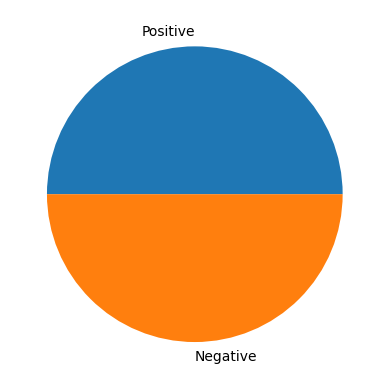

In [61]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [62]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [63]:
y_train_smote

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
14065    0.0
14066    0.0
14067    0.0
14068    0.0
14069    0.0
Name: label, Length: 14070, dtype: float64

In [64]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [65]:
y_test

6156    1.0
7548    1.0
9573    1.0
912     1.0
6623    1.0
       ... 
4639    1.0
9819    1.0
6255    1.0
8194    0.0
9487    1.0
Name: label, Length: 2000, dtype: float64

### Model training and evaluation

In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [67]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Naive Bayes

In [68]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.884
	Precision = 0.965
	Recall = 0.797
	F1-Score = 0.873
Testing Scores:
	Accuracy = 0.762
	Precision = 0.979
	Recall = 0.748
	F1-Score = 0.848


### Support vector

In [69]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.959
	Recall = 0.999
	F1-Score = 0.978
Testing Scores:
	Accuracy = 0.961
	Precision = 0.961
	Recall = 0.995
	F1-Score = 0.978


In [70]:
import pickle

with open('../static/model/model.pickle_mnb', 'wb') as file:
    pickle.dump(mnb, file)

In [71]:
import pickle

with open('../static/model/model.pickle_svm', 'wb') as file:
    pickle.dump(svm, file)